# Household Aggregate Table

Customer Profiles; RFM score and Customer Segmentation

## Business Summary/tl;dr

1. Created an aggregate table for households `hh_agg.csv`; a snapshot of their purchase behaviour.

2. Ranked households using RFM Score:
    - (R) The recency of purchaser activity. 
    - (F) Added 'days between transactions'; a measure of frequency of purchase.
    - (M) The monetary value of the customer. I opted for total sum, as frequency is included as a separate metric.
    
3. These rankings could be derived in a variety of ways, and are a great introduction to customer labelling. 
    - We should consider that many customers will have strong recency and frequency metrics in this data. 

4. Added 'sales by section'; an aggregate of spending in each of our derived `Section Labels` categories.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Household-Aggregate-Table" data-toc-modified-id="Household-Aggregate-Table-1">Household Aggregate Table</a></span><ul class="toc-item"><li><span><a href="#Business-Summary/tl;dr" data-toc-modified-id="Business-Summary/tl;dr-1.1">Business Summary/tl;dr</a></span></li></ul></li><li><span><a href="#TODO:" data-toc-modified-id="TODO:-2">TODO:</a></span></li><li><span><a href="#Household-Aggregate-Sales-Numbers" data-toc-modified-id="Household-Aggregate-Sales-Numbers-3">Household Aggregate Sales Numbers</a></span><ul class="toc-item"><li><span><a href="#hh_agg" data-toc-modified-id="hh_agg-3.1"><code>hh_agg</code></a></span></li><li><span><a href="#Household-Sales-by-Section-Labels" data-toc-modified-id="Household-Sales-by-Section-Labels-3.2">Household Sales by <code>Section Labels</code></a></span></li></ul></li><li><span><a href="#Household-Frequency-Score" data-toc-modified-id="Household-Frequency-Score-4">Household Frequency Score</a></span><ul class="toc-item"><li><span><a href="#Understanding-RFM" data-toc-modified-id="Understanding-RFM-4.1">Understanding RFM</a></span><ul class="toc-item"><li><span><a href="#Days-between-purchases-(Frequency)" data-toc-modified-id="Days-between-purchases-(Frequency)-4.1.1">Days between purchases (Frequency)</a></span></li><li><span><a href="#Checking-for-Nulls" data-toc-modified-id="Checking-for-Nulls-4.1.2">Checking for Nulls</a></span></li><li><span><a href="#Justifications" data-toc-modified-id="Justifications-4.1.3">Justifications</a></span></li></ul></li></ul></li><li><span><a href="#Dropping-NaN-households" data-toc-modified-id="Dropping-NaN-households-5">Dropping NaN households</a></span></li><li><span><a href="#RFM-Binning" data-toc-modified-id="RFM-Binning-6">RFM Binning</a></span></li><li><span><a href="#Adding-RFM-Score" data-toc-modified-id="Adding-RFM-Score-7">Adding RFM Score</a></span></li></ul></div>

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import my_funcs

# Household Aggregate Sales Numbers

Customer Profiles using `merged.csv`

In [28]:
merged = pd.read_csv('outputs/merged.csv', parse_dates=['datetime'])

In [29]:
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,datetime,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC
0,2319,28179463886,101,909714,1,0.79,427,0.00,119,15,0.0,0.0,2004-07-01 01:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG)
1,243,28197355878,102,909714,1,0.72,323,0.00,1011,15,0.0,0.0,2004-07-02 10:11:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG)
2,707,28210545743,103,909714,1,2.35,429,0.00,1119,15,0.0,0.0,2004-07-03 11:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG)
3,329,28210628714,103,909714,1,2.10,450,0.00,2037,15,0.0,0.0,2004-07-03 20:37:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG)
4,1029,28210676830,103,909714,1,0.81,329,0.00,1148,15,0.0,0.0,2004-07-03 11:48:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380945,2384,42250952449,708,18148536,2,1.76,389,0.00,1751,102,0.0,0.0,2006-02-28 17:51:00,69,GROCERY,Private,COLD CEREAL,ALL FAMILY CEREAL
2380946,2347,42250975392,708,14077733,1,2.50,438,-0.79,1054,102,0.0,0.0,2006-02-28 10:54:00,69,MEAT-PCKGD,Private,LUNCHMEAT,PEPPERONI/SALAMI
2380947,2280,42250975829,708,18106248,1,1.50,438,0.00,1307,102,0.0,0.0,2006-02-28 13:07:00,1687,DRUG GM,National,EASTER,EASTER FILL EGGS
2380948,886,42250982055,708,5589058,3,1.50,402,0.00,1910,102,0.0,0.0,2006-02-28 19:10:00,5423,MEAT-PCKGD,National,LUNCHMEAT,MISCELLANEOUS


Additional Maps for merged.csv

In [34]:
np.where(merged['BRAND'] == 'Private', 1, 0).sum()

671612

## `hh_agg` 

In [7]:
# Better?
# hh_agg = merged.groupby('household_key').agg({
#             'SALES_VALUE':'sum',
#             'RETAIL_DISC':'sum',
#             'COUPON_MATCH_DISC':'sum',
#             'QUANTITY':'sum',
#             'BASKET_ID':'nunique', 
#             'PRODUCT_ID':'nunique',
#             # 'COMMODITY_DESC':'nunique', # do you need this
#             'DAY':'min',
#             'DAY':'max',
# })

# # hh_agg.columns = ['total_sales']...#

# ### Deriving Avg. Basket Spend and Avg. Item Cost --

# # average basket spend
# hh_agg['avg_basket_spend'] = hh_agg['total_spend']/hh_agg['num_baskets']

# # average item cost (total spend/quantity)
# hh_agg['avg_item_cost'] = hh_agg['total_spend']/hh_agg['total_quantity']

In [8]:
# group transactions by household key and aggregate:
hh_agg = merged.groupby('household_key').agg(
    
# total spend 
    total_spend=pd.NamedAgg(column="SALES_VALUE", aggfunc="sum"),
# the total loyalty discount  
    total_loyalty=pd.NamedAgg(column="RETAIL_DISC", aggfunc="sum"), 
# the total coupon match discount  
    total_coupon=pd.NamedAgg(column="COUPON_MATCH_DISC", aggfunc="sum"),
# total quantity of items purchased   
    total_quantity=pd.NamedAgg(column='QUANTITY', aggfunc="sum"),
# the number of baskets  
    num_baskets=pd.NamedAgg(column='BASKET_ID', aggfunc='nunique'),
# number of unique of items purchased   
    unique_products=pd.NamedAgg(column='PRODUCT_ID', aggfunc='nunique'),
# first day of purchase
    first_purchase=pd.NamedAgg(column='DAY', aggfunc='min'),
# last day of purchase
    last_purchase=pd.NamedAgg(column='DAY', aggfunc='max'), 
                                                            )

### Deriving Avg. Basket Spend and Avg. Item Cost --

# average basket spend
hh_agg['avg_basket_spend'] = hh_agg['total_spend']/hh_agg['num_baskets']

# average item cost (total spend/quantity)
hh_agg['avg_item_cost'] = hh_agg['total_spend']/hh_agg['total_quantity']

In [27]:
merged['datetime']

0          2004-07-01 01:19:00
1          2004-07-02 10:11:00
2          2004-07-03 11:19:00
3          2004-07-03 20:37:00
4          2004-07-03 11:48:00
                  ...         
2380945    2006-02-28 17:51:00
2380946    2006-02-28 10:54:00
2380947    2006-02-28 13:07:00
2380948    2006-02-28 19:10:00
2380949    2006-02-28 22:06:00
Name: datetime, Length: 2380950, dtype: object

In [26]:
plt.hist(merged.groupby('household_key')['datetime'].mean())

plt.hist(merged.groupby('household_key')['datetime'].max())

plt.hist(merged.groupby('household_key')['datetime'].min())

plt.hist(merged.groupby('household_key')['datetime'].median())

TypeError: Could not convert 2004-09-03 10:58:002004-10-11 10:17:002004-10-27 13:49:002004-12-21 16:17:002005-05-17 15:59:002005-06-01 12:27:002005-06-29 11:51:002005-07-29 10:55:002005-10-11 11:34:002005-10-31 11:54:002005-11-22 11:06:002005-12-14 10:13:002006-02-17 13:21:002005-09-13 18:51:002005-09-28 13:37:002005-10-11 11:34:002004-10-11 10:17:002005-09-13 18:51:002005-09-28 13:37:002005-10-31 11:54:002005-11-09 11:25:002005-01-07 13:55:002004-07-01 16:03:002004-07-28 14:44:002004-08-06 20:03:002004-08-15 15:38:002004-09-16 15:21:002004-10-11 10:17:002004-11-12 17:05:002004-11-23 11:43:002004-12-10 14:58:002004-12-21 16:17:002004-12-29 15:28:002005-01-07 13:55:002005-01-16 15:50:002005-01-27 16:30:002005-02-22 14:06:002005-04-26 11:44:002005-05-23 13:16:002005-06-17 14:17:002005-06-29 11:51:002005-07-07 11:25:002005-07-23 12:42:002005-07-29 10:55:002005-08-10 18:11:002005-09-10 14:16:002005-09-13 18:51:002005-09-28 13:37:002005-11-22 11:06:002006-02-26 15:31:002005-01-07 13:55:002004-11-23 11:43:002004-12-21 16:17:002004-07-28 14:44:002004-08-06 20:03:002004-08-15 15:38:002004-08-24 14:49:002004-09-16 15:21:002004-09-30 14:22:002004-11-01 11:19:002004-11-12 17:05:002004-11-23 11:43:002004-12-10 14:58:002004-12-21 16:17:002004-12-29 15:28:002005-01-07 13:55:002005-01-27 16:30:002005-02-02 12:32:002005-02-09 14:26:002005-02-22 14:06:002005-03-09 11:42:002005-03-18 13:29:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-16 16:28:002005-07-29 10:55:002005-08-10 18:11:002005-09-13 18:51:002005-09-28 13:37:002005-10-11 11:34:002005-10-31 11:54:002005-11-09 11:25:002005-12-02 16:23:002005-12-14 10:13:002005-12-21 12:30:002006-01-11 16:02:002006-02-11 14:13:002006-02-26 15:31:002005-09-13 18:51:002004-07-28 14:44:002004-09-03 10:58:002004-12-21 16:17:002005-07-23 12:42:002004-10-27 13:49:002004-11-01 11:19:002005-11-18 15:41:002005-12-04 16:34:002005-12-21 12:30:002006-01-11 16:02:002006-01-26 16:40:002006-02-26 15:31:002004-08-15 15:38:002005-09-28 13:37:002004-11-01 11:19:002004-07-28 14:44:002005-10-31 11:54:002004-07-01 16:03:002004-07-28 14:44:002004-08-24 14:49:002004-10-19 18:29:002004-11-01 11:19:002004-11-12 17:05:002004-12-21 16:17:002004-12-29 15:28:002005-01-07 13:55:002005-01-16 15:50:002005-01-27 16:30:002005-02-09 14:26:002005-02-22 14:06:002005-03-09 11:42:002005-03-18 13:29:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-17 14:17:002005-07-07 11:25:002005-08-10 18:11:002005-09-13 18:51:002005-09-28 13:37:002005-10-31 11:54:002005-11-09 11:25:002005-11-20 15:55:002005-12-02 16:23:002006-01-11 16:02:002006-01-26 16:40:002006-02-11 14:13:002006-02-26 15:31:002005-09-13 18:51:002005-03-18 13:29:002005-04-26 11:44:002005-06-29 11:51:002006-01-26 16:40:002005-01-27 16:30:002004-11-12 17:05:002004-12-21 16:17:002005-05-17 15:59:002005-07-07 11:25:002005-11-09 11:25:002005-11-22 11:06:002005-12-21 12:30:002004-07-11 11:57:002004-08-24 14:49:002004-09-30 14:22:002004-12-21 16:17:002005-08-10 18:11:002005-01-16 15:50:002004-08-06 20:03:002004-09-30 14:22:002005-01-27 16:30:002005-02-09 14:26:002005-03-18 13:29:002005-06-01 12:27:002005-09-13 18:51:002005-11-09 11:25:002005-12-21 12:30:002006-01-26 16:40:002006-02-26 15:31:002004-11-01 11:19:002004-11-12 17:05:002004-12-10 14:58:002004-12-29 15:28:002005-02-22 14:06:002005-04-01 13:27:002005-07-16 16:28:002005-07-29 10:55:002004-11-01 11:19:002004-08-15 15:38:002004-11-01 11:19:002005-02-22 14:06:002005-10-11 11:34:002006-01-11 16:02:002006-02-26 15:31:002005-02-22 14:06:002005-03-18 13:29:002005-04-01 13:27:002005-09-13 18:51:002004-07-01 16:03:002004-07-08 15:13:002004-07-11 11:57:002004-07-28 14:44:002004-08-06 20:03:002004-08-15 15:38:002004-08-24 14:49:002004-09-08 10:43:002004-10-11 10:17:002004-12-10 14:58:002005-01-16 15:50:002005-01-27 16:30:002005-02-09 14:26:002005-02-22 14:06:002005-03-18 13:29:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-07 11:25:002005-07-23 12:42:002005-08-10 18:11:002005-09-08 19:29:002005-10-11 11:34:002005-11-09 11:25:002005-11-22 11:06:002005-12-02 16:23:002005-12-21 12:30:002005-12-29 13:46:002006-02-17 13:21:002004-11-01 11:19:002004-11-23 11:43:002004-12-21 16:17:002005-06-29 11:51:002005-12-21 12:30:002005-12-21 12:30:002005-01-16 15:50:002005-09-13 18:51:002006-02-26 15:31:002006-01-11 16:02:002005-06-17 14:17:002005-09-28 13:37:002006-02-26 15:31:002005-06-29 11:51:002006-01-26 16:40:002005-07-07 11:25:002004-09-30 14:22:002005-02-09 14:26:002005-02-22 14:06:002005-09-19 10:27:002005-12-02 16:23:002006-02-17 13:21:002005-05-08 14:08:002004-10-11 10:17:002005-03-18 13:29:002005-07-29 10:55:002005-09-28 13:37:002005-10-11 11:34:002004-09-03 10:58:002005-02-09 14:26:002005-02-22 14:06:002005-04-26 11:44:002005-09-19 10:27:002005-12-29 13:46:002006-01-26 16:40:002006-02-26 15:31:002005-08-10 18:11:002005-09-28 13:37:002004-07-08 15:13:002004-08-15 15:38:002004-12-10 14:58:002004-11-01 11:19:002005-02-22 14:06:002005-05-08 14:08:002006-01-26 16:40:002004-12-10 14:58:002005-11-09 11:25:002004-08-24 14:49:002005-05-17 15:59:002005-02-22 14:06:002004-08-15 15:38:002004-07-28 14:44:002006-01-26 16:40:002004-08-06 20:03:002004-08-15 15:38:002005-01-16 15:50:002005-06-01 12:27:002004-08-15 15:38:002005-11-09 11:25:002004-12-10 14:58:002004-08-15 15:38:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-29 10:55:002005-08-20 12:28:002005-09-08 19:29:002004-12-21 16:17:002005-01-07 13:55:002005-02-09 14:26:002005-04-01 13:27:002005-05-08 14:08:002005-06-01 12:27:002005-10-31 11:54:002005-01-07 13:55:002005-10-31 11:54:002006-01-26 16:40:002005-01-27 16:30:002005-06-01 12:27:002005-06-29 11:51:002005-12-21 12:30:002006-02-11 14:13:002005-07-29 10:55:002005-12-14 10:13:002005-04-01 13:27:002005-12-21 12:30:002006-01-26 16:40:002005-08-20 12:28:002005-07-29 10:55:002005-11-09 11:25:002005-12-21 12:30:002005-07-07 11:25:002005-08-10 18:11:002005-09-28 13:37:002004-12-21 16:17:002005-10-11 11:34:002005-05-23 13:16:002004-07-08 15:13:002004-08-06 20:03:002004-11-12 17:05:002005-12-21 12:30:002005-12-29 13:46:002004-09-08 10:43:002004-09-16 15:21:002004-09-30 14:22:002004-11-23 11:43:002005-06-29 11:51:002006-01-11 16:02:002006-02-17 13:21:002005-04-01 13:27:002004-12-21 16:17:002005-04-01 13:27:002005-07-23 12:42:002005-09-13 18:51:002005-12-14 10:13:002004-11-01 11:19:002004-11-23 11:43:002005-02-22 14:06:002005-11-09 11:25:002004-08-15 15:38:002004-09-03 10:58:002005-01-07 13:55:002005-02-09 14:26:002005-03-09 11:42:002005-12-21 12:30:002006-01-26 16:40:002006-02-11 14:13:002004-08-06 20:03:002004-12-21 16:17:002004-09-30 14:22:002005-05-17 15:59:002005-07-07 11:25:002005-07-29 10:55:002005-09-28 13:37:002005-11-09 11:25:002006-01-26 16:40:002005-06-01 12:27:002005-03-18 13:29:002006-01-11 16:02:002005-02-22 14:06:002005-07-29 10:55:002005-06-17 14:17:002004-12-21 16:17:002005-06-01 12:27:002004-08-06 20:03:002005-05-23 13:16:002005-07-07 11:25:002004-09-08 10:43:002005-07-29 10:55:002005-07-29 10:55:002004-11-23 11:43:002005-04-26 11:44:002005-11-09 11:25:002005-11-20 15:55:002005-08-20 12:28:002005-10-24 18:45:002005-12-02 16:23:002005-02-09 14:26:002005-02-22 14:06:002005-04-01 13:27:002005-04-26 11:44:002006-01-11 16:02:002004-11-12 17:05:002004-09-30 14:22:002004-08-24 14:49:002005-01-07 13:55:002004-09-30 14:22:002004-11-01 11:19:002004-12-29 15:28:002004-07-01 16:03:002004-09-03 10:58:002005-04-26 11:44:002006-02-26 15:31:002004-09-30 14:22:002004-10-11 10:17:002004-11-01 11:19:002004-12-21 16:17:002005-02-02 12:32:002005-02-22 14:06:002005-03-09 11:42:002005-05-08 14:08:002005-05-17 15:59:002005-06-17 14:17:002005-07-29 10:55:002005-09-28 13:37:002005-11-09 11:25:002004-08-15 15:38:002004-11-23 11:43:002005-02-09 14:26:002005-03-18 13:29:002004-08-06 20:03:002004-09-03 10:58:002004-10-19 18:29:002004-11-23 11:43:002004-12-21 16:17:002005-01-27 16:30:002005-03-18 13:29:002005-05-23 13:16:002005-12-29 13:46:002006-02-26 15:31:002004-11-01 11:19:002004-07-08 15:13:002004-11-12 17:05:002004-11-23 11:43:002004-12-29 15:28:002005-01-07 13:55:002005-01-16 15:50:002005-01-27 16:30:002005-02-09 14:26:002005-02-22 14:06:002005-03-18 13:29:002006-02-07 17:54:002005-08-06 16:28:002004-09-03 10:58:002006-02-11 14:13:002004-09-30 14:22:002004-09-16 15:21:002005-04-01 13:27:002005-10-31 11:54:002005-11-09 11:25:002005-12-21 12:30:002006-01-11 16:02:002006-01-26 16:40:002006-02-26 15:31:002004-07-08 15:13:002004-08-15 15:38:002006-02-11 14:13:002006-02-17 13:21:002005-02-22 14:06:002005-12-14 10:13:002004-11-12 17:05:002005-06-29 11:51:002005-11-09 11:25:002004-08-15 15:38:002004-08-06 20:03:002004-09-03 10:58:002004-10-11 10:17:002004-11-01 11:19:002005-02-22 14:06:002005-09-28 13:37:002005-12-02 16:23:002005-02-09 14:26:002005-04-01 13:27:002006-02-15 10:26:002004-11-12 17:05:002006-02-17 13:21:002004-08-15 15:38:002004-07-28 14:44:002004-08-06 20:03:002004-09-03 10:58:002004-11-23 11:43:002004-12-10 14:58:002005-01-27 16:30:002005-02-22 14:06:002005-04-26 11:44:002004-09-03 10:58:002004-12-29 15:28:002005-01-27 16:30:002005-05-17 15:59:002005-06-17 14:17:002005-03-18 13:29:002005-06-01 12:27:002005-07-29 10:55:002004-07-11 11:57:002004-07-28 14:44:002004-08-24 14:49:002004-11-23 11:43:002004-12-10 14:58:002005-02-22 14:06:002005-04-01 13:27:002005-04-26 11:44:002005-06-17 14:17:002005-07-07 11:25:002005-07-29 10:55:002005-09-08 19:29:002006-02-07 17:54:002004-08-06 20:03:002005-09-13 18:51:002006-02-26 15:31:002004-09-30 14:22:002004-08-15 15:38:002004-12-21 16:17:002005-04-26 11:44:002005-10-31 11:54:002005-12-21 12:30:002006-01-26 16:40:002005-01-27 16:30:002005-11-22 11:06:002005-12-21 12:30:002005-02-22 14:06:002005-10-31 11:54:002005-12-29 13:46:002005-08-20 12:28:002005-12-02 16:23:002006-02-17 13:21:002006-02-26 15:31:002005-01-27 16:30:002005-01-16 15:50:002004-12-21 16:17:002005-06-01 12:27:002004-09-03 10:58:002004-11-01 11:19:002005-01-16 15:50:002005-07-29 10:55:002004-08-24 14:49:002005-07-29 10:55:002005-09-28 13:37:002004-12-10 14:58:002005-06-29 11:51:002004-12-10 14:58:002004-07-28 14:44:002005-01-07 13:55:002005-02-22 14:06:002005-06-17 14:17:002005-08-20 12:28:002005-09-13 18:51:002005-09-28 13:37:002006-01-26 16:40:002005-01-07 13:55:002005-10-11 11:34:002004-09-30 14:22:002006-01-11 16:02:002005-10-11 11:34:002004-11-23 11:43:002004-12-21 16:17:002004-09-16 15:21:002004-10-11 10:17:002004-11-12 17:05:002004-11-23 11:43:002004-12-21 16:17:002005-01-16 15:50:002005-12-14 10:13:002006-02-11 14:13:002005-02-09 14:26:002005-10-11 11:34:002006-01-11 16:02:002004-07-01 16:03:002004-09-16 15:21:002004-08-06 20:03:002004-09-03 10:58:002004-09-16 15:21:002004-09-30 14:22:002004-11-01 11:19:002004-12-10 14:58:002004-12-29 15:28:002005-02-22 14:06:002005-05-08 14:08:002005-06-01 12:27:002005-11-09 11:25:002005-12-02 16:23:002006-01-26 16:40:002006-02-11 14:13:002006-02-17 13:21:002004-07-08 15:13:002004-08-06 20:03:002004-09-16 15:21:002004-10-11 10:17:002004-10-27 13:49:002004-12-21 16:17:002005-01-07 13:55:002005-01-16 15:50:002005-01-27 16:30:002005-02-09 14:26:002005-03-09 11:42:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-06-01 12:27:002005-06-17 14:17:002005-10-11 11:34:002005-11-09 11:25:002005-11-22 11:06:002005-12-29 13:46:002005-12-02 16:23:002006-01-11 16:02:002006-02-07 17:54:002004-09-03 10:58:002005-06-01 12:27:002005-09-13 18:51:002004-12-21 16:17:002005-01-27 16:30:002005-12-02 16:23:002005-09-28 13:37:002004-09-30 14:22:002004-10-19 18:29:002005-11-09 11:25:002005-12-21 12:30:002005-04-01 13:27:002005-12-14 10:13:002004-08-24 14:49:002004-11-01 11:19:002005-01-27 16:30:002005-07-07 11:25:002005-10-24 18:45:002006-01-11 16:02:002005-02-09 14:26:002006-02-17 13:21:002004-08-15 15:38:002005-09-28 13:37:002004-08-15 15:38:002004-12-10 14:58:002004-12-29 15:28:002005-06-01 12:27:002006-02-11 14:13:002005-10-11 11:34:002005-01-07 13:55:002004-09-03 10:58:002005-11-09 11:25:002005-10-11 11:34:002005-10-24 18:45:002005-10-31 11:54:002005-11-09 11:25:002005-12-02 16:23:002005-12-14 10:13:002005-12-29 13:46:002006-01-11 16:02:002006-02-17 13:21:002005-05-08 14:08:002005-06-01 12:27:002005-07-29 10:55:002005-08-20 12:28:002005-09-28 13:37:002005-11-09 11:25:002005-12-02 16:23:002006-01-11 16:02:002004-11-01 11:19:002004-07-01 16:03:002004-08-06 20:03:002004-09-16 15:21:002004-10-11 10:17:002005-06-01 12:27:002005-07-29 10:55:002005-09-13 18:51:002005-11-09 11:25:002005-12-14 10:13:002006-02-17 13:21:002004-11-01 11:19:002005-10-31 11:54:002005-11-09 11:25:002004-07-01 16:03:002004-11-01 11:19:002005-09-13 18:51:002005-07-29 10:55:002005-01-07 13:55:002005-06-01 12:27:002005-07-07 11:25:002005-09-13 18:51:002006-01-26 16:40:002005-07-07 11:25:002004-09-03 10:58:002004-09-30 14:22:002004-11-01 11:19:002004-12-10 14:58:002004-12-21 16:17:002005-02-22 14:06:002005-03-09 11:42:002005-04-01 13:27:002005-07-29 10:55:002005-10-11 11:34:002005-12-14 10:13:002006-02-11 14:13:002006-02-17 13:21:002004-08-06 20:03:002004-09-08 10:43:002005-02-09 14:26:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-07-23 12:42:002005-09-28 13:37:002005-10-31 11:54:002005-11-22 11:06:002006-01-26 16:40:002005-01-07 13:55:002005-10-11 11:34:002005-04-26 11:44:002005-12-14 10:13:002004-07-01 16:03:002004-07-28 14:44:002004-08-06 20:03:002004-08-15 15:38:002004-11-01 11:19:002005-05-08 14:08:002005-05-17 15:59:002005-05-23 13:16:002005-06-01 12:27:002004-07-01 16:03:002004-07-08 15:13:002004-07-28 14:44:002004-08-06 20:03:002004-08-15 15:38:002004-08-24 14:49:002004-09-08 10:43:002004-09-16 15:21:002004-09-30 14:22:002004-10-11 10:17:002004-10-27 13:49:002004-11-01 11:19:002004-11-12 17:05:002004-11-23 11:43:002004-12-10 14:58:002004-12-21 16:17:002004-12-29 15:28:002005-01-07 13:55:002005-01-16 15:50:002005-01-27 16:30:002005-02-02 12:32:002005-02-09 14:26:002005-02-22 14:06:002005-03-09 11:42:002005-03-18 13:29:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-05-23 13:16:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-07 11:25:002005-07-16 16:28:002005-07-23 12:42:002005-07-29 10:55:002005-08-10 18:11:002005-08-20 12:28:002005-09-13 18:51:002005-09-19 10:27:002005-09-28 13:37:002005-10-11 11:34:002005-10-24 18:45:002005-10-31 11:54:002005-11-22 11:06:002005-12-14 10:13:002005-12-21 12:30:002006-01-11 16:02:002004-07-01 16:03:002004-07-01 16:03:002005-01-07 13:55:002004-07-01 16:03:002005-06-29 11:51:002004-07-01 16:03:002004-07-28 14:44:002004-08-24 14:49:002004-09-30 14:22:002004-11-12 17:05:002004-12-21 16:17:002005-03-18 13:29:002005-05-17 15:59:002005-06-17 14:17:002005-07-16 16:28:002005-08-20 12:28:002005-10-31 11:54:002005-12-14 10:13:002006-01-26 16:40:002004-07-01 16:03:002004-11-01 11:19:002004-12-10 14:58:002005-02-22 14:06:002005-04-01 13:27:002006-02-11 14:13:002004-07-01 16:03:002004-07-28 14:44:002004-08-15 15:38:002004-09-03 10:58:002004-09-30 14:22:002005-02-22 14:06:002005-03-18 13:29:002005-04-01 13:27:002005-05-17 15:59:002005-07-07 11:25:002005-07-16 16:28:002005-07-23 12:42:002005-07-29 10:55:002005-08-04 13:57:002005-09-08 19:29:002005-09-19 10:27:002005-09-28 13:37:002005-12-14 10:13:002006-01-11 16:02:002004-07-01 16:03:002004-07-08 15:13:002004-08-15 15:38:002004-08-24 14:49:002004-07-01 16:03:002005-11-09 11:25:002004-09-16 15:21:002005-05-17 15:59:002004-08-24 14:49:002004-08-15 15:38:002004-08-06 20:03:002005-02-09 14:26:002004-07-28 14:44:002004-11-23 11:43:002005-04-26 11:44:002005-09-28 13:37:002004-07-08 15:13:002006-02-15 10:26:002005-06-29 11:51:002006-02-17 13:21:002005-01-27 16:30:002005-01-07 13:55:002005-05-23 13:16:002005-05-08 14:08:002004-09-30 14:22:002004-11-01 11:19:002006-01-11 16:02:002005-07-07 11:25:002005-07-23 12:42:002005-07-29 10:55:002005-08-10 18:11:002005-09-13 18:51:002004-12-21 16:17:002004-11-23 11:43:002004-12-21 16:17:002005-04-26 11:44:002005-09-28 13:37:002005-10-11 11:34:002005-10-24 18:45:002005-10-31 11:54:002006-02-15 10:38:002004-07-28 14:44:002004-09-03 10:58:002005-01-07 13:55:002005-03-09 11:42:002004-07-28 14:44:002005-05-08 14:08:002005-09-13 18:51:002005-11-09 11:25:002006-01-11 16:02:002005-11-20 15:55:002005-09-08 19:29:002005-11-09 11:25:002004-11-01 11:19:002005-05-23 13:16:002006-01-11 16:02:002006-01-26 16:40:002004-09-16 15:21:002004-11-01 11:19:002004-12-21 16:17:002005-05-17 15:59:002005-11-09 11:25:002005-11-22 11:06:002005-12-21 12:30:002004-09-08 10:43:002005-02-22 14:06:002005-05-23 13:16:002005-08-20 12:28:002006-02-15 10:26:002005-05-08 14:08:002004-09-03 10:58:002004-09-30 14:22:002004-12-21 16:17:002005-01-07 13:55:002005-03-09 11:42:002005-09-28 13:37:002006-02-17 13:21:002005-12-21 12:30:002004-09-16 15:21:002004-10-11 10:17:002005-07-29 10:55:002006-02-26 15:31:002005-08-20 12:28:002005-01-16 15:50:002005-06-01 12:27:002005-10-11 11:34:002005-11-09 11:25:002005-03-18 13:29:002005-01-07 13:55:002005-01-27 16:30:002005-02-02 12:32:002005-02-09 14:26:002005-02-22 14:06:002005-03-09 11:42:002005-03-18 13:29:002005-04-26 11:44:002005-05-08 14:08:002005-06-01 12:27:002005-12-21 12:30:002006-01-26 16:40:002006-02-11 14:13:002005-07-07 11:25:002004-07-11 11:57:002004-07-28 14:44:002004-08-15 15:38:002004-09-03 10:58:002004-11-01 11:19:002004-12-10 14:58:002004-12-29 15:28:002005-02-09 14:26:002005-02-22 14:06:002005-03-18 13:29:002005-05-23 13:16:002005-07-29 10:55:002005-09-13 18:51:002005-09-28 13:37:002005-11-09 11:25:002005-12-04 16:34:002005-03-18 13:29:002005-04-26 11:44:002005-05-08 14:08:002005-06-17 14:17:002006-01-26 16:40:002004-09-03 10:58:002004-07-28 14:44:002005-04-26 11:44:002004-07-28 14:44:002004-09-03 10:58:002004-09-16 15:21:002004-09-30 14:22:002004-11-01 11:19:002004-12-21 16:17:002005-01-07 13:55:002005-01-27 16:30:002005-02-22 14:06:002005-03-09 11:42:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-07-07 11:25:002005-07-29 10:55:002005-09-28 13:37:002005-10-11 11:34:002005-12-02 16:23:002005-12-21 12:30:002005-12-29 13:46:002006-01-11 16:02:002006-02-11 14:13:002004-07-28 14:44:002005-08-20 12:28:002005-06-29 11:51:002004-09-03 10:58:002005-11-22 11:06:002005-07-07 11:25:002004-07-28 14:44:002004-09-16 15:21:002004-12-10 14:58:002005-02-09 14:26:002005-05-17 15:59:002005-09-28 13:37:002005-12-02 16:23:002005-12-14 10:13:002005-05-08 14:08:002005-04-26 11:44:002005-11-09 11:25:002005-12-02 16:23:002004-12-23 10:56:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-29 11:51:002005-07-16 16:28:002005-08-20 12:28:002005-09-13 18:51:002005-10-11 11:34:002005-10-31 11:54:002005-06-29 11:51:002006-01-11 16:02:002004-07-28 14:44:002004-09-03 10:58:002005-02-22 14:06:002005-12-14 10:13:002004-09-16 15:21:002005-12-02 16:23:002004-09-03 10:58:002005-11-09 11:25:002004-08-06 20:03:002005-01-16 15:50:002005-07-07 11:25:002005-11-09 11:25:002004-09-03 10:58:002004-11-23 11:43:002005-03-18 13:29:002005-07-29 10:55:002005-06-01 12:27:002004-08-06 20:03:002005-11-09 11:25:002006-01-26 16:40:002006-02-11 14:13:002005-05-23 13:16:002005-12-14 10:13:002005-01-16 15:50:002005-09-28 13:37:002004-09-03 10:58:002005-01-27 16:30:002005-12-21 12:30:002004-07-28 14:44:002004-08-06 20:03:002005-05-08 14:08:002005-10-31 11:54:002004-07-28 14:44:002005-09-13 18:51:002005-10-11 11:34:002005-11-09 11:25:002004-09-08 10:43:002004-11-12 17:05:002004-07-08 15:13:002004-09-16 15:21:002005-03-18 13:29:002005-07-23 12:42:002004-08-06 20:03:002004-08-24 14:49:002004-09-03 10:58:002004-11-23 11:43:002004-12-21 16:17:002005-01-07 13:55:002005-04-01 13:27:002004-09-16 15:21:002005-07-29 10:55:002005-06-01 12:32:002005-07-07 11:27:002005-05-08 14:08:002005-02-22 14:06:002005-03-09 11:42:002005-03-09 11:42:002005-10-11 11:34:002005-10-31 11:54:002005-03-18 13:29:002005-09-28 13:37:002005-07-07 11:25:002005-04-26 11:44:002005-06-29 11:51:002005-08-20 12:28:002005-09-28 13:37:002005-09-13 18:51:002006-02-17 13:21:002004-12-10 14:58:002004-11-23 11:43:002005-02-02 12:32:002005-12-02 16:23:002004-09-03 10:58:002005-02-22 14:06:002006-01-11 16:02:002004-07-28 14:44:002004-08-15 15:38:002004-10-11 10:17:002004-11-23 11:43:002004-12-21 16:17:002005-01-07 13:55:002005-01-16 15:50:002005-02-02 12:32:002005-02-22 14:06:002005-04-01 13:27:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-07 11:25:002005-07-16 16:28:002005-07-29 10:55:002005-09-13 18:51:002005-11-09 11:25:002005-12-02 16:23:002005-12-14 10:13:002005-12-31 14:01:002006-01-11 16:02:002006-01-26 16:40:002006-02-11 14:13:002006-02-26 15:31:002005-11-20 15:55:002004-08-06 20:03:002006-01-26 16:40:002004-11-12 17:05:002006-02-07 17:54:002005-12-14 10:13:002006-02-26 15:31:002005-01-27 16:30:002005-05-08 14:08:002004-12-21 16:17:002005-03-18 13:29:002005-08-20 12:28:002004-09-03 10:58:002005-06-01 12:27:002005-03-09 11:42:002005-12-21 12:30:002004-11-01 11:19:002005-07-29 10:55:002005-09-08 19:29:002005-09-28 13:37:002005-10-11 11:34:002005-10-24 18:45:002005-10-31 11:54:002005-11-09 11:25:002005-12-02 16:23:002005-12-14 10:13:002006-01-26 16:40:002006-02-11 14:13:002006-02-26 15:31:002004-08-15 15:38:002004-11-01 11:19:002004-12-23 10:56:002005-06-01 12:27:002005-11-09 11:25:002005-09-28 13:37:002004-10-27 13:49:002006-02-15 10:26:002004-07-28 14:44:002004-08-06 20:03:002005-03-09 11:42:002005-09-13 18:51:002004-07-28 14:44:002004-07-28 14:44:002005-02-22 14:06:002005-04-01 13:27:002005-12-21 12:30:002006-01-11 16:02:002006-02-11 14:13:002004-10-19 18:29:002005-03-09 11:42:002005-04-01 13:27:002005-01-16 15:50:002005-06-01 12:27:002005-10-31 11:54:002005-04-01 13:27:002005-02-09 14:26:002006-02-26 15:31:002005-04-01 13:27:002005-09-28 13:37:002004-08-06 20:03:002005-06-29 11:51:002004-08-06 20:03:002004-09-03 10:58:002004-09-30 14:22:002004-10-19 18:29:002005-04-26 11:44:002005-06-01 12:27:002005-06-17 14:17:002005-06-29 11:51:002005-07-07 11:25:002005-07-16 16:28:002004-10-27 13:49:002005-03-09 11:42:002005-07-29 10:55:002005-12-29 13:46:002006-01-26 16:40:002005-04-26 11:44:002004-07-11 11:57:002005-04-26 11:44:002004-07-11 11:57:002004-07-28 14:44:002004-07-11 11:57:002004-07-11 11:57:002004-07-11 11:57:002004-12-21 16:17:002005-08-20 12:28:002005-09-28 13:37:002005-10-11 11:34:002005-11-09 11:25:002006-01-11 16:02:002005-03-18 13:29:002005-04-26 11:44:002005-05-08 14:08:002005-05-17 15:59:002005-06-01 12:27:002005-06-17 14:17:002005-07-23 12:42:002005-08-10 18:11:002005-08-20 12:28:002005-09-28 13:37:002005-10-11 11:34:002005-10-24 18:45:002005-12-14 10:13:002006-02-11 14:13:002006-02-26 15:31:002005-05-17 15:59:002005-10-11 11:34:002006-01-11 16:02:002006-02-11 14:13:002005-02-09 14:26:002004-12-21 16:17:002005-12-21 12:30:002005-09-28 13:37:002004-08-06 20:03:002005-09-28 13:37:002004-08-06 20:03:002005-01-27 16:30:002005-09-13 18:51:002005-12-02 16:23:002004-11-23 11:43:002004-12-21 16:17:002005-02-22 14:06:002004-11-01 11:19:002005-02-22 14:06:002004-12-10 14:58:002005-02-22 14:06:002005-06-29 11:51:002004-12-10 14:58:002005-02-22 14:06:002005-03-09 11:42:002005-06-01 12:27:002005-05-23 13:16:002006-02-26 15:31:002005-06-01 12:27:002005-05-17 15:59:002006-02-15 10:26:002005-10-11 11:34:002006-02-26 15:31:002004-09-08 10:43:002005-06-01 12:27:002005-06-17 14:17:002006-02-11 14:13:002004-11-23 11:43:002005-09-28 13:37:002005-10-11 11:34:002005-11-09 11:25:002004-11-01 11:19:002005-04-01 13:27:002005-10-31 11:54:002005-11-09 11:25:002005-01-07 13:55:002005-07-07 11:25:002005-11-09 11:25:002005-07-07 11:25:002006-01-26 16:40:002004-09-16 15:21:002004-09-30 14:22:002004-12-21 16:17:002005-05-08 14:08:002005-10-11 11:34:002005-11-20 15:55:002005-05-18 15:04:002006-01-26 16:40:002006-02-11 14:13:002005-09-28 13:37:002005-11-09 11:25:002006-01-26 16:40:002005-02-22 14:06:002004-12-21 16:17:002004-12-21 16:17:002005-03-18 13:29:002005-09-13 18:51:002005-04-01 13:27:002004-08-06 20:03:002005-03-09 11:42:002004-08-24 14:49:002004-11-01 11:19:002005-10-31 11:54:002005-12-29 13:46:002004-07-28 14:44:002005-05-08 14:08:002004-11-01 11:19:002005-01-27 16:30:002005-04-01 13:27:002005-10-11 11:34:002005-01-07 13:55:002005-02-22 14:06:002005-07-07 11:25:002005-04-26 11:44:002005-06-01 12:27:002005-12-21 12:30:002004-12-21 16:17:002004-12-23 10:56:002005-12-02 16:23:002004-08-15 15:38:002005-12-02 16:23:002004-11-01 11:19:002004-07-28 14:44:002004-08-06 20:03:002004-08-24 14:49:002004-09-03 10:58:002004-09-30 14:22:002005-03-18 13:29:002005-06-01 12:27:002005-06-29 11:51:002005-07-07 11:25:002005-08-06 16:28:002005-09-28 13:37:002005-10-11 11:34:002005-12-02 16:23:002005-12-21 12:30:002004-11-01 11:19:002005-10-11 11:34:002005-10-31 11:54:002005-11-09 11:25:002005-01-07 13:55:002004-11-23 11:43:002005-01-16 15:50:002005-04-01 13:27:002006-02-26 15:31:002004-09-03 10:58:002004-10-11 10:17:002004-11-01 11:19:002004-11-23 11:43:002004-12-21 16:17:002005-01-16 15:50:002005-02-02 12:32:002005-02-22 14:06:002005-03-09 11:42:002005-03-18 13:29:002005-04-26 11:44:002005-05-17 15:59:002005-06-17 14:17:002005-07-29 10:55:002005-09-13 18:51:002005-09-28 13:37:002005-11-09 11:25:002006-02-17 13:21:002005-05-23 13:16:002005-12-02 16:23:002004-09-03 10:58:002005-02-09 14:26:002005-07-29 10:55:002005-09-28 13:37:002006-02-26 15:31:002005-10-24 18:45:002004-08-06 20:03:002005-01-27 16:30:002004-11-01 11:19:002004-12-21 16:17:002004-12-10 14:58:002004-12-23 10:56:002004-08-15 15:38:002004-09-03 10:58:002004-09-16 15:21:002005-01-07 13:55:002005-07-29 10:55:002004-11-23 11:43:002005-01-16 15:50:002004-12-10 14:58:002005-12-14 10:13:002005-12-02 16:23:002004-07-28 14:44:002004-07-28 14:44:002004-07-28 14:44:002004-07-28 14:44:002004-07-28 14:44:002004-07-28 14:44:002004-07-28 14:44:002006-02-17 13:21:002005-04-26 11:44:002005-03-18 13:29:002004-12-10 14:58:002005-03-18 13:29:002005-03-09 11:42:002004-11-01 11:19:002005-11-09 11:25:002004-12-10 14:58:002005-05-08 14:08:002005-09-08 19:29:002004-08-24 14:49:002005-04-01 13:27:002005-06-01 12:27:002005-06-17 14:17:002004-09-16 15:21:002004-11-23 11:43:002004-08-06 20:03:002004-08-06 20:03:002004-10-19 18:29:002004-11-23 11:43:002005-02-22 14:06:002004-08-06 20:03:002005-03-09 11:42:002005-03-09 11:42:002004-09-08 10:43:002005-06-01 12:27:002005-12-29 13:46:002005-12-02 16:23:002004-12-10 14:58:002004-09-16 15:21:002005-02-09 14:26:002005-02-22 14:06:002005-06-01 12:27:002005-07-29 10:55:002005-09-13 18:51:002006-02-11 14:13:002006-02-26 15:31:002004-11-01 11:19:002004-09-30 14:22:002005-05-17 15:59:002004-09-03 10:58:002005-06-17 14:17:002005-07-16 16:28:002005-10-31 11:54:002005-04-26 11:44:002005-10-11 11:34:002005-02-09 14:26:002004-08-15 15:38:002005-04-01 13:27:002004-09-08 10:43:002005-02-22 14:06:002005-01-27 16:30:002004-09-16 15:21:002004-09-30 14:22:002004-10-11 10:17:002004-12-21 16:17:002005-02-22 14:06:002005-05-17 15:59:002005-06-01 12:27:002005-07-29 10:55:002005-09-28 13:37:002005-11-09 11:25:002005-12-21 12:30:002006-01-26 16:40:002006-02-17 13:21:002005-02-09 14:26:002005-05-17 15:59:002004-09-08 10:43:002004-09-30 14:22:002004-11-01 11:19:002005-02-22 14:06:002004-10-11 10:17:002005-03-18 13:29:002004-10-11 10:17:002004-11-01 11:19:002004-12-10 14:58:002005-06-17 14:17:002004-09-03 10:58:002004-08-24 14:49:002005-09-13 18:51:002004-12-21 16:17:002005-12-21 12:30:002005-12-29 13:46:002006-02-11 14:13:002006-02-11 14:13:002004-09-16 15:21:002004-11-01 11:19:002006-02-11 14:13:002005-03-09 11:42:002005-05-17 15:59:002004-12-21 16:17:002005-01-07 13:55:002004-09-30 14:22:002006-02-26 15:31:002005-04-01 13:27:002005-11-09 11:25:002004-09-03 10:58:002006-02-17 13:21:002004-09-30 14:22:002006-01-11 16:02:002004-12-29 15:28:002005-01-27 16:30:002005-11-09 11:25:002004-11-01 11:19:002004-11-12 17:05:002005-10-11 11:34:002005-07-16 16:28:002004-09-08 10:43:002006-01-26 16:40:002004-10-27 13:49:002004-11-01 11:19:002005-03-09 11:42:002005-06-17 14:17:002006-01-26 16:40:002005-10-11 11:34:002005-05-23 13:16:002004-09-30 14:22:002004-09-16 15:21:002004-10-19 18:29:002004-11-12 17:05:002004-09-16 15:21:002005-05-08 14:08:002005-07-23 12:42:002006-01-11 16:02:002005-02-22 14:06:002005-04-26 11:44:002005-01-27 16:30:002004-12-10 14:58:002004-09-30 14:22:002005-02-22 14:06:002005-03-18 13:29:002005-09-13 18:51:002005-01-27 16:30:002005-04-01 13:27:002005-07-29 10:55:002006-02-07 17:54:002005-05-08 14:08:002005-03-09 11:42:002005-03-18 13:29:002005-04-01 13:27:002005-10-24 18:45:002005-11-09 11:25:002005-09-28 13:37:002005-10-11 11:34:002005-12-02 16:23:002004-10-19 18:29:002004-10-19 18:29:002004-10-11 10:17:002005-05-23 13:16:002004-12-10 14:58:002004-10-11 10:17:002004-10-11 10:17:002004-12-23 10:56:002004-11-01 11:19:002005-07-23 12:42:002005-03-18 13:29:002005-05-17 15:59:002005-12-21 12:30:002004-11-01 11:19:002004-11-01 11:19:002004-11-01 11:19:002005-10-11 11:34:002006-02-17 13:21:002005-01-07 13:55:002005-06-01 12:27:002005-01-07 13:55:002004-11-12 16:29:002006-02-07 17:54:002005-05-17 15:59:002005-02-22 14:06:002005-12-21 12:30:002004-11-23 11:07:002005-04-01 12:25:002005-04-26 10:36:002004-11-23 11:43:002004-11-23 11:43:002005-12-02 16:23:002006-02-17 13:21:002005-08-10 18:11:002004-12-21 16:17:002005-06-01 12:27:002004-12-21 16:17:002004-12-29 15:28:002005-01-07 13:55:002006-01-11 16:02:002005-01-07 13:55:002005-06-01 12:27:002005-12-14 10:13:002005-01-16 15:50:002006-02-11 14:13:002005-06-01 12:27:002005-09-09 18:30:002006-01-11 16:02:002005-03-18 13:29:002005-04-15 10:58:002005-04-26 11:44:002005-06-01 12:27:002005-07-29 10:55:002005-09-13 18:51:002005-09-28 13:37:002005-10-11 11:34:002006-02-11 14:13:002005-11-09 11:25:002005-06-29 11:51:002005-03-18 13:29:002006-02-07 17:54:002005-02-22 14:06:002005-05-08 14:08:002005-05-08 14:08:002005-04-01 13:27:002005-03-18 13:29:002005-04-01 13:27:002005-06-17 14:17:002005-06-29 11:51:002005-10-31 11:54:002005-06-01 12:27:002006-02-17 13:21:002005-05-08 14:08:002005-08-10 18:11:002006-01-26 16:40:002005-06-17 14:17:002005-06-29 11:51:002005-05-08 14:08:002005-12-02 16:23:002005-07-29 10:55:002005-05-17 15:59:002006-02-26 15:31:002006-02-07 17:54:002005-06-01 12:27:002005-06-29 11:51:002005-07-16 16:28:002005-08-10 18:11:002005-09-28 13:37:002005-10-11 11:34:002005-11-09 11:25:002005-12-02 16:23:002006-01-11 16:02:002006-02-11 14:13:002005-12-21 12:30:002005-08-06 16:28:002005-08-10 18:11:002005-11-09 11:25:002006-02-15 10:26:002006-01-11 16:02:002005-12-02 16:23:002006-02-11 14:13:002005-11-20 15:55:002005-09-28 13:37:002005-10-31 11:54:002005-12-02 16:23:002005-12-29 13:46:002006-02-11 14:13:002005-11-09 11:25:002005-09-11 16:57:002005-09-13 18:51:002005-09-13 18:51:002005-10-11 11:34:002006-02-07 17:54:002005-11-22 11:06:002006-01-11 16:02:002006-01-26 16:40:002005-10-31 11:54:002005-10-11 11:34:002005-11-20 15:55:002006-02-26 15:31:002005-11-09 11:25:002005-12-21 12:30:002006-02-17 13:21:002005-12-02 16:23:002005-12-21 12:30:002006-02-17 13:21:002006-02-26 15:31:002006-01-26 16:40:002006-02-11 14:13:002006-02-11 14:13:00 to numeric

In [9]:
hh_agg

## INITIAL AGGREGATE TABLE

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,first_purchase,last_purchase,avg_basket_spend,avg_item_cost
household_key,,,,,,,,,,
1,4120.07,-642.14,-25.65,1901,81,655,101,706,50.865062,2.167317
2,1954.34,-333.50,0.00,833,45,545,103,668,43.429778,2.346146
3,2633.20,-667.59,-19.80,1589,46,513,113,703,57.243478,1.657143
4,1200.11,-115.65,0.00,382,30,164,104,627,40.003667,3.141649
5,695.32,-94.48,0.00,224,36,182,111,703,19.314444,3.104107
...,...,...,...,...,...,...,...,...,...,...
2496,4015.65,-1103.17,-12.40,1893,48,753,117,683,83.659375,2.121315
2497,6792.55,-1299.67,-0.75,2928,202,968,102,700,33.626485,2.319860
2498,2524.85,-275.58,0.00,954,168,639,105,707,15.028869,2.646593


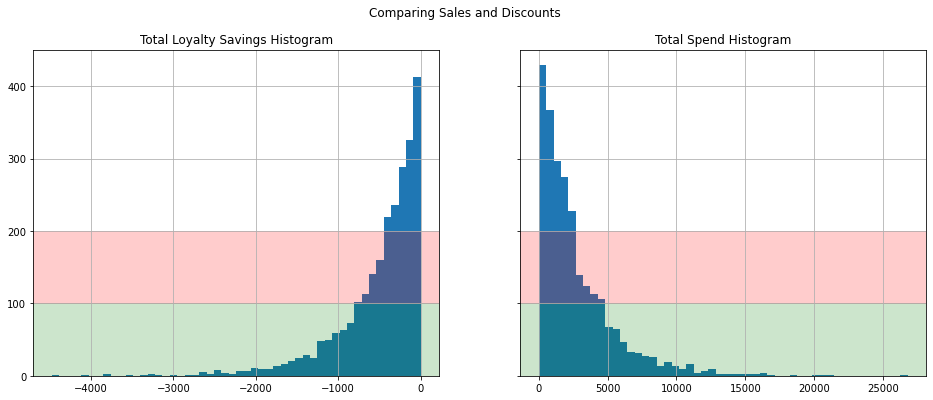

In [132]:
# Loyalty Program Plot
plt.subplots(1, 2, figsize=(16,6), sharey=True)
plt.suptitle('Comparing Sales and Discounts')
plt.subplot(1,2,1)
plt.title('Total Loyalty Savings Histogram')
hh_agg['total_loyalty'].hist(bins=50)

plt.axhspan(0, 100, color='green', alpha=0.2)
plt.axhspan(100, 200, color='red', alpha=0.2)

plt.subplot(1,2,2)
plt.title('Total Spend Histogram')
hh_agg['total_spend'].hist(bins=50)

plt.axhspan(0, 100, color='green', alpha=0.2)
plt.axhspan(100, 200, color='red', alpha=0.2)

plt.show()

## Household Sales by `Section Labels`

I'd like to give any future unsupervised modelling as much variance and definition as possible about each household and it's tendencies.  To do so, I'd like to multiply the sales value of each transaction (row), at it's `COMMODITY_DESC` binary value -- to define the total sales per `COMMODITY` for either `baskets` or `households`.

In [133]:
%time
# get dummies for each transaction row
section_dummies = pd.get_dummies(merged['Section Labels'])

# multiply each row by it's SALES VALUE
section_sales = section_dummies.apply(lambda x: x * merged['SALES_VALUE'])

# add and group by household key, sum all rows from the dummy columns
section_sales = section_sales.join(merged[['household_key']]).groupby('household_key').agg(sum)

Wall time: 0 ns


In [151]:
section_sales

### SECTION-SALES AGGREGATE TABLE

,alcohol,beverages,concessions,dairy,drug,garden,grain_goods,grocery,home_family,junk_food,kitchen,meat,misc,produce,seasonal
household_key,,,,,,,,,,,,,,,
1,6.48,314.83,20.33,362.76,53.44,0.00,668.41,230.24,537.29,764.02,1.59,379.04,303.82,477.82,0.00
2,47.67,91.59,41.93,157.36,45.10,0.00,144.89,47.21,477.92,255.63,7.98,277.78,139.88,212.41,6.99
3,5.72,95.38,43.88,126.85,5.37,0.00,272.97,136.42,161.92,508.39,0.00,814.45,198.42,261.44,1.99
4,248.72,2.99,4.89,132.36,8.08,0.00,93.72,85.07,148.71,261.64,0.00,135.09,60.13,18.71,0.00
5,51.75,57.25,2.49,53.18,46.42,0.00,17.42,15.96,162.64,34.12,3.99,154.29,81.88,12.64,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,166.03,85.29,22.28,242.55,1.85,0.00,321.16,103.29,424.82,360.46,7.48,1587.79,358.50,332.36,1.79
2497,371.42,123.06,79.81,468.03,61.09,9.28,570.01,350.91,868.09,832.75,3.99,1560.83,529.81,940.00,23.47
2498,137.29,138.24,54.13,391.57,156.36,5.17,319.38,145.57,262.77,252.69,0.00,305.32,128.00,228.36,0.00


Great, so we now have a household aggregate table that shows which types of products our customers purchased the most.

Let's pull out some other useful stats about each household;

Note that we have fewer than 2500 households in our data due to previous truncations.

In [153]:
# Adding commodity_sales to hh_agg
hh_agg = hh_agg.merge(section_sales, on='household_key')
hh_agg.shape

(2493, 25)

# Household Frequency Score

## Understanding RFM

**Recency, Frequency, Monetary** analysis is employed in order to identify the highest-value customers in sales data. 

The simple score reflects how recently and often a customer made purchases, as well as how much they typically spend.

To give our customers a score, we'll have to create an aggregate table of each household's tendencies from their recorded transactions. 

Let's start by developing a **frequency of purchase** measure; the `DAY`s between purchases.

### Days between purchases (Frequency)

Disregarding multiple transactions on the same day-- find the average difference between days of purchase.

I've opted to truncate the data first, but it's arguable that we would get more accurate information on some households if we used all the information available.

In [136]:
# toy line of code using .diff() to understand the calculation for frequency of purchase

# hh_key = 1

# pd.Series(merged[merged['household_key'] == hh_key]['DAY'].unique()).sort_values().diff()[1:].mean()

In [137]:
def days_between(merged):
    days_between = dict()
    # loop through household_keys
    for key in merged['household_key'].unique():

        # find the subset of transactions matching that household and  use .diff() to calculate the days between...
        # ...transactions; multiple transactions on the same day are ignored.
        a = pd.Series(merged[merged['household_key']==key]['DAY'].unique()).sort_values().diff()[1:]

        #calculate the mean difference between days of purchase
        days_between[key] = round(a.mean(), 2)


    return pd.Series(data=days_between.values(), index=days_between.keys())

days_between_purchases = days_between(merged)

In [154]:
days_between_purchases

2319    14.95
243      3.63
707      1.96
329      4.28
1029     3.62
        ...  
954     14.35
650     10.73
272     15.75
1043    37.27
231       NaN
Name: days_between_purchases, Length: 2493, dtype: float64

We got some nan values.

### Checking for Nulls

In [139]:
nan_hh = days_between_purchases[days_between_purchases.isna()].index
len(nan_hh) 
# the households with nan values -- likely indicating only 1 purchase (and therefore 1 day of purchases --can't .diff())

In [141]:
# all baskets for households which have a nan value; 9 baskets for 8 households
merged[merged['household_key'].isin(nan_hh)]['BASKET_ID'].unique()

array([31541289172, 28294286140, 33460696537, 42090586088, 42090586098,
       32505231021, 31336500577, 40085705595, 33659283460], dtype=int64)

In [142]:
merged[merged['household_key'].isin(nan_hh)].groupby('household_key')['DAY'].nunique()
# number of baskets for households with nan days_between_purchase value

household_key
231     1
298     1
948     1
1309    1
1727    1
2249    1
2422    1
2444    1
Name: DAY, dtype: int64

### Justifications

These households had only 1 `DAY` of purchases in the store -- potentially due to previous truncations this effect is also shown below, in the total output/shape of the function.

We knew that our data had holes, and this will have to be another. We could fill with the mean; with an arbitrarily large number; or simply drop them from our analysis.

**Rather than add bias through imputation, I'd prefer to drop them from our aggregate table as non-relevant and potentially outlying data points**.

We'll 'clean' the hh_agg table NaN values once we've added the other metrics.

In [155]:
# assigning column name
days_between_purchases.name = 'days_between_purchases'
# checking shape
days_between_purchases.shape

(2493,)

Great. We have an aggregate column to add to the aggregate table `hh_agg`, below.

In [156]:
# joining average days between purchases
hh_agg = hh_agg.join(days_between_purchases, on='household_key')

In [160]:
hh_agg.head()

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,first_purchase,last_purchase,avg_basket_spend,avg_item_cost,...,grain_goods,grocery,home_family,junk_food,kitchen,meat,misc,produce,seasonal,days_between_purchases
household_key,,,,,,,,,,,,,,,,,,,,,
1,4120.07,-642.14,-25.65,1901,81,655,101,706,50.865062,2.167317,...,668.41,230.24,537.29,764.02,1.59,379.04,303.82,477.82,0.00,8.29
2,1954.34,-333.50,0.00,833,45,545,103,668,43.429778,2.346146,...,144.89,47.21,477.92,255.63,7.98,277.78,139.88,212.41,6.99,12.84
3,2633.20,-667.59,-19.80,1589,46,513,113,703,57.243478,1.657143,...,272.97,136.42,161.92,508.39,0.00,814.45,198.42,261.44,1.99,13.41
4,1200.11,-115.65,0.00,382,30,164,104,627,40.003667,3.141649,...,93.72,85.07,148.71,261.64,0.00,135.09,60.13,18.71,0.00,18.03
5,695.32,-94.48,0.00,224,36,182,111,703,19.314444,3.104107,...,17.42,15.96,162.64,34.12,3.99,154.29,81.88,12.64,1.29,21.14


In [162]:
hh_agg.isna().sum()

total_spend               0
total_loyalty             0
total_coupon              0
total_quantity            0
num_baskets               0
unique_products           0
first_purchase            0
last_purchase             0
avg_basket_spend          0
avg_item_cost             0
alcohol                   0
beverages                 0
concessions               0
dairy                     0
drug                      0
garden                    0
grain_goods               0
grocery                   0
home_family               0
junk_food                 0
kitchen                   0
meat                      0
misc                      0
produce                   0
seasonal                  0
days_between_purchases    8
dtype: int64

# Dropping NaN households

In [163]:
hh_agg.dropna(axis=0, inplace=True)

hh_agg.shape

(2485, 26)

# RFM Binning

Now that we've established some necessary features (and removed some outliers), let's proceed to assign RFM scores to each of our households.

**5 will indicate the highest score, while 1 will indicate the lowest score**. We will define the points based on three columns for this purpose;

`last_purchase`, `days_between_purchase`, and `total_spend`. (Avg daily spend??)

# Adding RFM Score

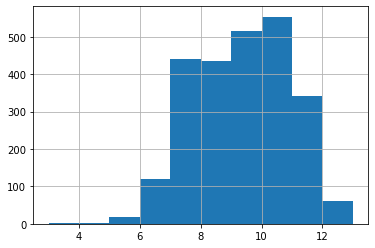

In [164]:
labels = [5,4,3,2,1] 

### Recency
arr = np.array(hh_agg['last_purchase'])
arr = pd.qcut(np.ravel(arr), 5, labels=range(1,6))
hh_agg['R'] = arr

### Frequency
arr = np.array(hh_agg['days_between_purchases'])
arr = pd.qcut(np.ravel(arr), 5, labels=range(1,6))
hh_agg['F'] = arr

### Monetary
arr = np.array(hh_agg['total_spend'])
arr = pd.qcut(np.ravel(arr), 5, labels=range(1,6))
hh_agg['M'] = arr


hh_agg['RFM'] = hh_agg[['R', 'F', 'M']].astype(int).sum(axis=1)

hh_agg['RFM'].hist()

plt.show()

In [165]:
hh_agg.to_csv('outputs/hh_agg.csv')